<h2><center> Image Classification of Birds using the iNaturalist Dataset</center></h2>
<h3><center>Springboard | Capstone 2: In-Depth Analysis/Modeling: Model 1 </center></h3>
<h4><center>By: Lauren Broussard</center></h4>

### MODEL 1.

For our first model, we'll create a simple neural network to see how it does. We'll add five hidden layers, and a flatten layer. Our first layer will include 32 nodes, and we'll use ReLU activation for each of our hidden layers.

First, we'll run some of our setup operations from our PreProcessing Notebook. In it, we do a number of set up steps like create our train, test, and validation sets, set up the number of epochs to run, and augment the orientation of our training and validation images. 

In [28]:
print("Pre-Processing & Set Up")
%run ./2.0_PreProcessing_SetUp.ipynb

Pre-Processing & Set Up
Total Images To Use: 5000

Number of Training Images:  2800
Number of Validation Images:  1000
Number of Test Images:  1200 

Enter Total Epochs: 25
img_dir =  ../data/raw/
img_width, img_height =  128 128
batch_size =  128
no_epochs =  25
no_classes =  2
patience =  7 


Augment Images - Training
Found 2800 validated image filenames belonging to 2 classes.
CPU times: user 33.8 ms, sys: 12 ms, total: 45.9 ms
Wall time: 46 ms

Augment Images - Validation and Testing
Found 1000 validated image filenames belonging to 2 classes.
CPU times: user 13.2 ms, sys: 3.85 ms, total: 17 ms
Wall time: 17.4 ms


#### Set Architecture

In [2]:
model1 = Sequential()

model1.add(Dense(32,activation = 'relu', input_shape = (img_width,img_height,3)))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))

model1.add(Flatten())
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

#### Compile

In [3]:
%%time
# compile, and add metrics==['accuracy'] to keep track of diagnostics for each epoch
model1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

CPU times: user 8.06 ms, sys: 1.31 ms, total: 9.37 ms
Wall time: 8.53 ms


#### Fit

In [4]:
%%time
model1_history = model1.fit(
    train_generator,
    steps_per_epoch= len(df_train) // batch_size,
    epochs=no_epochs,
    validation_data=valid_generator,
    validation_steps= len(df_val) // batch_size,
    callbacks = [early_stopping_monitor],
    verbose=2)

Epoch 1/25
21/21 - 75s - loss: 1.8734 - accuracy: 0.5659 - val_loss: 0.6808 - val_accuracy: 0.6339
Epoch 2/25
21/21 - 53s - loss: 0.6057 - accuracy: 0.6781 - val_loss: 0.5740 - val_accuracy: 0.6853
Epoch 3/25
21/21 - 56s - loss: 0.5807 - accuracy: 0.6976 - val_loss: 0.5482 - val_accuracy: 0.7132
Epoch 4/25
21/21 - 53s - loss: 0.5594 - accuracy: 0.7133 - val_loss: 0.5651 - val_accuracy: 0.7121
Epoch 5/25
21/21 - 56s - loss: 0.5490 - accuracy: 0.7152 - val_loss: 0.5291 - val_accuracy: 0.7299
Epoch 6/25
21/21 - 55s - loss: 0.5348 - accuracy: 0.7332 - val_loss: 0.5114 - val_accuracy: 0.7321
Epoch 7/25
21/21 - 56s - loss: 0.5254 - accuracy: 0.7309 - val_loss: 0.5120 - val_accuracy: 0.7455
Epoch 8/25
21/21 - 57s - loss: 0.5094 - accuracy: 0.7515 - val_loss: 0.4954 - val_accuracy: 0.7746
Epoch 9/25
21/21 - 56s - loss: 0.5047 - accuracy: 0.7549 - val_loss: 0.4798 - val_accuracy: 0.7734
Epoch 10/25
21/21 - 55s - loss: 0.4957 - accuracy: 0.7609 - val_loss: 0.4962 - val_accuracy: 0.7522
Epoch 11/

#### View Model Summaries

In [5]:
# view model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128, 128, 32)      128       
_________________________________________________________________
dense_1 (Dense)              (None, 128, 128, 32)      1056      
_________________________________________________________________
dense_2 (Dense)              (None, 128, 128, 32)      1056      
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16777248  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

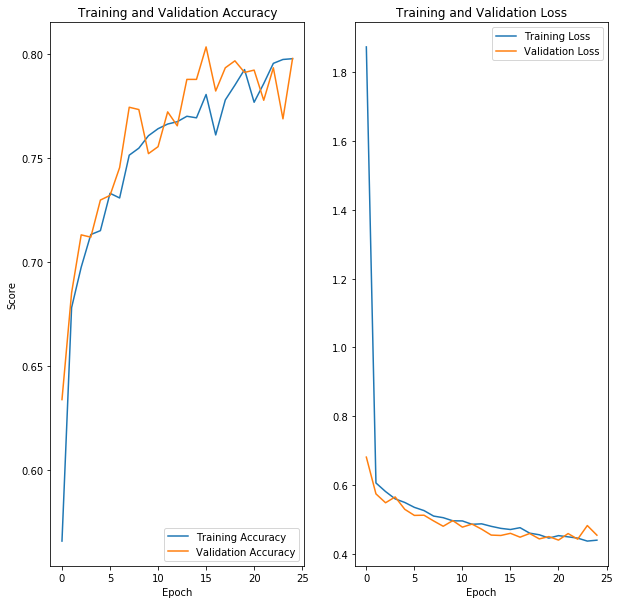

In [6]:
plot_accuracy_and_loss(model1_history) #called from 2.0_PreProcessing Notebook

#### Save Model

In [7]:
# save model
file_name = 'model1.h5'
model1.save('../models/{}'.format(file_name))

----

#### Predict

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
                    dataframe=df_test,
                    directory=img_dir,
                    x_col="file_name",
                    y_col="is_bird",
                    batch_size=batch_size,
                    class_mode="binary",    
                    target_size=(img_height,img_width))

Found 1200 validated image filenames belonging to 2 classes.


### RESULTS & VISUALIZATIONS

In [35]:
%%time

# make predictions on model1
y_pred = model1.predict_classes(test_generator)


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Not Bird', 'Bird']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[320 265]
 [332 283]]
Classification Report
              precision    recall  f1-score   support

    Not Bird       0.49      0.55      0.52       585
        Bird       0.52      0.46      0.49       615

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200

CPU times: user 24.1 s, sys: 9.29 s, total: 33.4 s
Wall time: 12.5 s


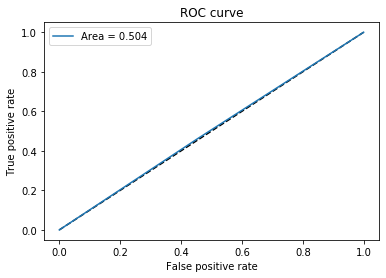

In [36]:
plot_auc_roc(test_generator.classes,y_pred) #called from 2.0_PreProcessing Notebook

----

This model performs about as well as chance. 

In [ ]:
%load_ext watermark
%watermark -a "Lab 2.0" -d -t -v -p numpy,pandas,tensorflow,keras